<a href="https://colab.research.google.com/github/adnansherwani/Forecasting-DataModel/blob/main/Laptop_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's Building blocks for the neural networks [link: https://pytorch.org/docs/stable/nn.html#module-torch.nn]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder, StandardScaler

#PyTorch Version
torch.__version__

'2.4.1+cu121'

In [4]:
df = pd.read_csv(r'/content/laptop_price1.csv', encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


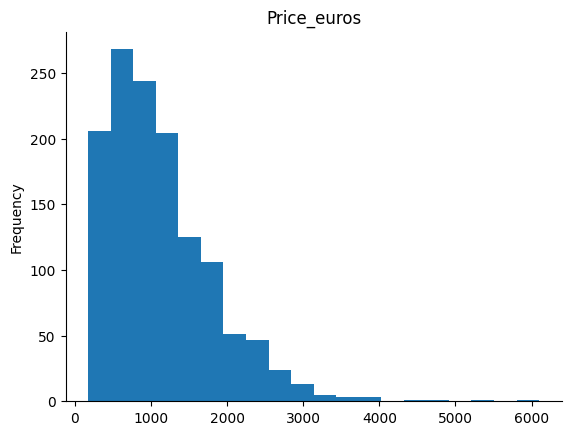

In [5]:
# @title Price_euros

from matplotlib import pyplot as plt
df['Price_euros'].plot(kind='hist', bins=20, title='Price_euros')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [7]:
# prompt: generate value count for all the categorical columns

for column in df.columns:
  if df[column].dtype == object:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for Company:
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


Value counts for Product:
Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64


Value counts for TypeName:
TypeNam

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [10]:
df['inches'] = df['Inches'].astype(int)
df.drop('Inches', axis=1, inplace=True)

In [11]:
SR = pd.read_excel('/content/laptopPrice_ScreenResolution.xlsx')
SR.head()

,ScreenResolution,Screen Resolution Full,Display Technology,Sceen Resolution,TouchScreen
0,Full HD 1920x1080,1920x1080,TN/VA,1920x1080,N
1,1366x768,1366x768,TN/VA,1366x768,N
2,IPS Panel Full HD 1920x1080,IPS 1920x1080,IPS,1920x1080,N
3,IPS Panel Full HD / Touchscreen 1920x1080,IPS 1920x1080,IPS,1920x1080,Y
4,Full HD / Touchscreen 1920x1080,IPS 1920x1080,IPS,1920x1080,Y


In [12]:
df = pd.merge(df, SR, on='ScreenResolution', how='left').drop(["ScreenResolution", "Screen Resolution Full"], axis=1)
df.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,inches,Display Technology,Sceen Resolution,TouchScreen
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,13,IPS,2560x1600,N
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,13,TN/VA,1440x900,N
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,15,TN/VA,1920x1080,N
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,15,IPS,2880x1800,N
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,13,IPS,2560x1600,N


In [13]:
df.rename(columns={'Sceen Resolution': 'Screen Resolution'}, inplace=True)

In [14]:
df['Screen Resolution'].value_counts().nunique()

10

In [15]:
df['TouchScreen'].nunique()

2

In [16]:
df['Cpu'].nunique()

118

In [17]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [18]:
df[~df['Cpu'].str.contains('Intel|AMD')]

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,inches,Display Technology,Screen Resolution,TouchScreen
1191,1209,Samsung,Chromebook Plus,2 in 1 Convertible,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0,12,IPS,2400x1600,Y


In [19]:
df['Cpu_Brand'] = df['Cpu'].str.extract('(Intel|AMD|Samsung)')

In [20]:
df['Cpu_Brand'].isna().sum()

0

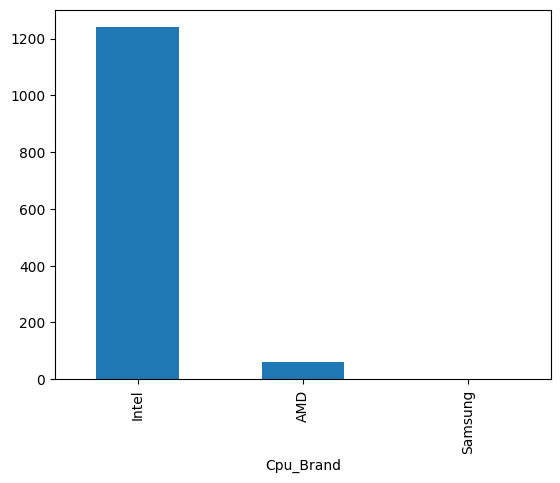

In [21]:
df['Cpu_Brand'].value_counts().plot.bar();

In [22]:
df['Ram'].value_counts()

,count
Ram,
8GB,619
4GB,375
16GB,200
6GB,41
12GB,25
2GB,22
32GB,17
24GB,3
64GB,1


In [23]:
df.rename(columns={'Ram': 'Ram_GB'}, inplace=True)

In [24]:
df['Ram_GB'] = df['Ram_GB'].str.replace('GB', '').astype(int)

In [25]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [26]:
df['Memory_Type'] = df['Memory'].str.extract('(SSD|HDD)')

In [27]:
df['Memory_Type'].value_counts()

,count
Memory_Type,
SSD,843
HDD,376


In [28]:
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace(' ', '')
df['Memory'] = df['Memory'].str.replace('SSD', '')
df["Memory"] = df["Memory"].str.replace('FlashStorage', '')
df['Memory'] = df['Memory'].str.replace('HDD', '')
df['Memory'] = df['Memory'].str.replace('.', '')
df['Memory'] = df['Memory'].str.replace(' ', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
df['Memory'] = df['Memory'].str.replace('Hybrid', '')

In [29]:
def add_str_values(memory_str):
  if '+' in memory_str:
    values = memory_str.split('+')
    return str(sum(int(v) for v in values))
  else:
    return memory_str

df['Memory'] = df['Memory'].apply(add_str_values)
print(df['Memory'].to_numpy())

['128' '128' '256' ... '64' '1000' '500']


In [30]:
df['Memory'].unique()

array(['128', '256', '512', '500', '1000', '32', '1128', '64', '1256',
       '2256', '2000', '10000', '1512', '756', '2128', '1024', '16',
       '768', '2512', '1064', '180', '240', '8', '508', '10512', '10256'],
      dtype=object)

In [31]:
df['Memory'] = df['Memory'].astype(int)

In [32]:
df['Gpu'].str.contains('Nvidia|Intel|AMD').value_counts()

,count
Gpu,
True,1302
False,1


In [33]:
df['Gpu_Brand'] = df['Gpu'].str.extract('(Nvidia|Intel|AMD|ARM)')

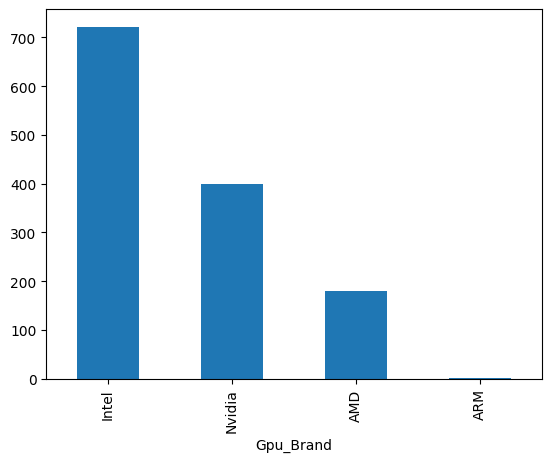

In [34]:
df['Gpu_Brand'].value_counts().plot.bar();

In [35]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [36]:
df['Gpu'].str.contains('HD|UHD|GeForce|Radeon|Quadro').value_counts()

,count
Gpu,
True,1279
False,24


In [37]:
df['Gpu_Type'] = df['Gpu'].str.extract(r'^\w+\s(\w+)')

In [38]:
df.rename(columns={'Weight': 'Weight_kg'}, inplace=True)
df['Weight_kg'] = df['Weight_kg'].str.replace('kg', '').astype(float)
df['Weight_kg'].round(1).astype(str)

,Weight_kg
0,1.4
1,1.3
2,1.9
3,1.8
4,1.4
...,...
1298,1.8
1299,1.3
1300,1.5
1301,2.2


In [39]:
df.dtypes

,0
laptop_ID,int64
Company,object
Product,object
TypeName,object
Cpu,object
Ram_GB,int64
Memory,int64
Gpu,object
OpSys,object
Weight_kg,float64


In [40]:
df.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,inches,Display Technology,Screen Resolution,TouchScreen,Cpu_Brand,Memory_Type,Gpu_Brand,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,13,IPS,2560x1600,N,Intel,SSD,Intel,Iris
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,13,TN/VA,1440x900,N,Intel,NaN,Intel,HD
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,15,TN/VA,1920x1080,N,Intel,SSD,Intel,HD
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,15,IPS,2880x1800,N,Intel,SSD,AMD,Radeon
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,13,IPS,2560x1600,N,Intel,SSD,Intel,Iris


In [41]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Cpu', 'Ram_GB',
       'Memory', 'Gpu', 'OpSys', 'Weight_kg', 'Price_euros', 'inches',
       'Display Technology', 'Screen Resolution', 'TouchScreen', 'Cpu_Brand',
       'Memory_Type', 'Gpu_Brand', 'Gpu_Type'],
      dtype='object')

In [42]:
df['Product_Name'] = df['Product'].str.extract(r'(\w+)')

In [43]:
df['Price_euros'].round(0).astype(int).inplace=True

In [44]:
df.drop(['Product', 'laptop_ID', ], axis=1, inplace=True)

In [45]:
# prompt: convert the object datatype to numerical and then normalize the data for deep learning
# Create a copy of the DataFrame to avoid modifying the original
df_processed = df.copy()

# Iterate through columns and convert object (categorical) data to numerical using Label Encoding
for column in df_processed.columns:
  if df_processed[column].dtype == object:
    le = LabelEncoder()
    df_processed[column] = le.fit_transform(df_processed[column])

# Separate features (X) and target (y) if needed (assuming 'Price_euros' is the target)
X = df_processed.drop('Price_euros', axis=1)
y = df_processed['Price_euros']

# # Normalize the feature data using StandardScaler
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)

# # Convert the normalized data back to a DataFrame (optional)
# X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
X_train.head()

,Company,TypeName,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,inches,Display Technology,Screen Resolution,TouchScreen,Cpu_Brand,Memory_Type,Gpu_Brand,Gpu_Type,Product_Name
10,7,3,74,4,500,53,4,1.86,15,1,0,0,1,0,2,4,4
147,2,3,37,4,1000,43,5,2.00,15,1,3,0,1,0,2,4,145
1287,7,3,89,6,1000,21,5,2.19,15,1,0,0,1,0,0,10,2
767,4,1,92,16,1128,89,5,2.72,15,0,14,1,1,1,3,2,69
816,14,4,96,16,512,53,5,1.29,12,0,14,1,1,1,2,4,12


In [47]:
len(X_train), len(X_test)

(1042, 261)

In [48]:
len(y_train), len(y_test)

(1042, 261)

In [50]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

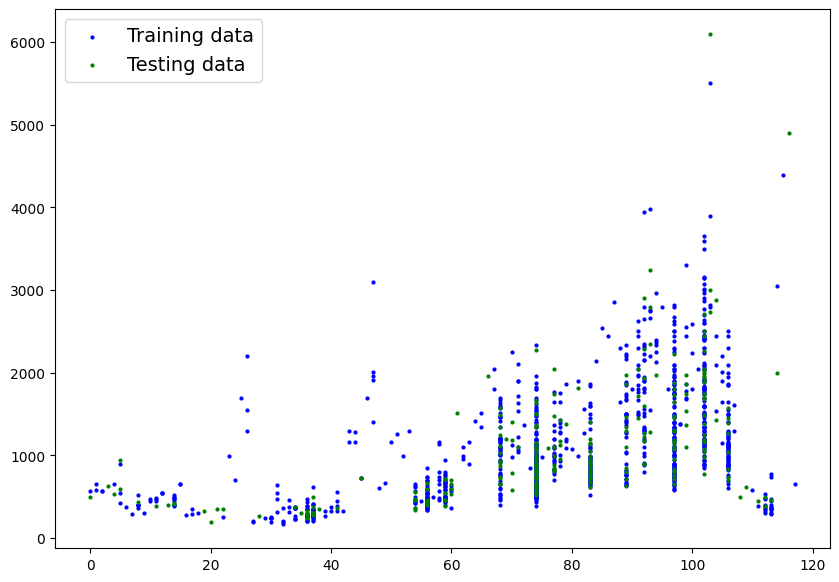

In [52]:
plot_predictions(X_train['Cpu'], y_train, X_test['Cpu'], y_test)

In [53]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=17,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=17, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[ 0.1854,  0.2013, -0.0568,  0.2228, -0.0531,  0.0489, -0.1181,  0.1424,
                         0.2138, -0.1779,  0.2108,  0.0454,  0.1792,  0.0328,  0.1169, -0.0342,
                         0.1870]])),
              ('linear_layer.bias', tensor([0.0358]))]))

In [54]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [55]:
# Set model to GPU if it's available, otherwise it'll default to CPU
device = ''
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

In [56]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [57]:
# Convert the Pandas DataFrames (X_train, X_test) to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)

# Convert Pandas Series (y_train, y_test) to PyTorch tensors
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [58]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1042])) that is different to the input size (torch.Size([1042, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([261])) that is different to the input size (torch.Size([261, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 1144.289306640625 | Test loss: 3903.689208984375
Epoch: 100 | Train loss: 1122.80224609375 | Test loss: 3733.26904296875
Epoch: 200 | Train loss: 1243.5118408203125 | Test loss: 3624.93017578125
Epoch: 300 | Train loss: 1305.7056884765625 | Test loss: 3569.203125
Epoch: 400 | Train loss: 1347.7786865234375 | Test loss: 3531.451904296875
Epoch: 500 | Train loss: 1382.081787109375 | Test loss: 3500.532958984375
Epoch: 600 | Train loss: 1409.9190673828125 | Test loss: 3475.48388671875
Epoch: 700 | Train loss: 1433.49072265625 | Test loss: 3454.034912109375
Epoch: 800 | Train loss: 1453.49560546875 | Test loss: 3435.756591796875
Epoch: 900 | Train loss: 1468.5677490234375 | Test loss: 3422.035400390625


In [59]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
#print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight',
              tensor([[ 1.7206,  0.8002,  3.4365,  0.7748, -1.5492,  5.2632,  0.7729,  0.5459,
          3.8817,  0.0930,  0.2101,  0.0621,  0.4228,  0.5520,  0.4481,  1.3109,
          1.2764]])),
             ('linear_layer.bias', tensor([0.3253]))])

And the original values for weights and bias are:


In [60]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[ 3.6212e+02],
        [ 3.7092e+02],
        [-1.2671e+03],
        [-5.8443e+02],
        [ 1.8700e+02],
        [ 4.5087e+02],
        [ 4.9700e+02],
        [-2.3747e+03],
        [-7.8435e+02],
        [-5.3834e+02],
        [ 2.5480e+02],
        [-7.5202e+02],
        [ 4.3426e+02],
        [-9.1100e+02],
        [-9.4372e+02],
        [ 5.1117e+02],
        [ 3.3045e+02],
        [-5.6231e+02],
        [-7.5992e+02],
        [ 4.4002e+02],
        [-7.4758e+02],
        [ 1.4569e+02],
        [ 3.2112e+02],
        [ 5.0463e+02],
        [ 4.0451e+02],
        [-7.5136e+02],
        [-4.2979e+01],
        [-5.6742e+01],
        [ 2.4359e+02],
        [ 3.3929e+02],
        [-8.9516e+02],
        [ 4.2706e+02],
        [-4.7845e+00],
        [ 3.2427e+02],
        [ 3.9083e+02],
        [-5.8439e+02],
        [-6.5762e+02],
        [-1.2885e+02],
        [-8.2164e+02],
        [ 3.7715e+02],
        [ 5.0105e+02],
        [-2.3837e+03],
        [-8.0927e+02],
        [-7

In [61]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

NameError: name 'epoch_count' is not defined